# Capstone 1 Data Wrangling/Cleaning

My question for my Capstone project is to see if we can use survey data to create categorize the respondents based on how they answered questions on political preferences in the United States.

This document will be cleaning the dataset. The dataset in question can be found at the following website, which also contains a link to download the documentation as a pdf:
https://www.voterstudygroup.org/publication/2018-voter-survey-1

My primary goals for this document are the following:

1. Resolve any missing values in the dataset
2. Drop any irrelevant rows and columns to my research question
3. Manipulate the data so it can be easily used in an eventual clustering algorithm by changing all needed columns to be categorical variables


# 1. Importing libraries and data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Importing the primary data set and a csv file that I created that incidate my manual labels for the different survey questions to help deal with wrangling. 

### 1.1 First dataset exploration

In [2]:
raw = pd.read_csv("VOTER_Survey_April18_Release1.csv")
coltypes = pd.read_csv("coltypes.csv")
data = raw
raw.head()

C:\Users\James\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (200,349,407,417,573,587,596,599,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,767,771,773,829,831,834,839,863,865,867,870,873,916,930,932,935,937,939,941,943,945,947,949,951,953,955,957,959,961,963,965,967,969,971,977,983,989,1005,1009,1012,1029,1033,1035,1036,1037,1039,1046,1048,1050,1052,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,case_identifier,caseid,weight_panel,weight_latino,weight_18_24,weight_overall,cassfullcd,add_confirm_2018,inputzip_2018,votereg_2018,...,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2017,endtime_2017,starttime_2016,endtime_2016,starttime,endtime
0,779.0,382484815.0,0.502544,NaN,NaN,0.359510,602.0,1.0,NaN,1.0,...,Dean Heller,Republican,NaN,NaN,14jul2017 15:05:53,14jul2017 15:37:41,29nov2016 22:59:43,29nov2016 23:28:24,08apr2018 14:10:47,08apr2018 14:51:11
1,2108.0,382162624.0,0.388691,NaN,NaN,0.736387,405.0,1.0,NaN,1.0,...,Jeff Flake,Republican,NaN,NaN,13jul2017 18:45:42,13jul2017 20:20:33,29nov2016 15:41:28,29nov2016 18:58:28,05apr2018 20:46:44,05apr2018 23:04:23
2,2597.0,382165114.0,0.684193,NaN,NaN,0.631656,5506.0,1.0,NaN,1.0,...,Tommy Thompson,Republican,NaN,NaN,13jul2017 18:11:20,13jul2017 18:43:52,29nov2016 16:08:39,29nov2016 16:32:43,06apr2018 03:22:57,06apr2018 03:52:48
3,4148.0,NaN,NaN,NaN,NaN,NaN,4001.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14dec2016 18:46:33,14dec2016 19:11:20,NaN,NaN
4,4460.0,382338436.0,0.322488,NaN,NaN,0.488005,4828.0,2.0,78253.0,1.0,...,Ted Cruz,Republican,NaN,NaN,19jul2017 09:29:05,19jul2017 10:07:07,01dec2016 10:17:47,01dec2016 10:59:48,09apr2018 10:42:48,09apr2018 12:20:27


The coltypes file contains 3 columns:
1. Name: The name of the survey question, corresponds to a column in the survey data set. 
2. Type: The data type of the response. Most of these are Categorical, but some are labeled with some nuance. We will explore each type in more detail as I clean the data.
3. Section: This is the subject matter of the question. This will create our groups to perform the eventual component analysis during the model-building state. It isn't used for cleaning at all. 

In [3]:
coltypes.sample(5)

,Name,Type,Section
717,dailytalkshow_99_baseline,Cat,MediaConsump
1068,starttime_2017,Probably drop,ProbablyDrop
583,smoke100_2016,Cat,RespInfo
112,electway4_2018,Cat,Elections
78,taxdoug_2018,Cat,Taxes


The initial data has 9334 rows that represent a survey respondent and 1074 columns that represent a survey question

In [4]:
data.shape

(9334, 1074)

In [5]:
data.sample(5, axis=1, random_state=1111).head(5)

,satisf_Economy_2018,abortview3_2016,therm_baseline,pid3_2018,selfdescr_ccap_7_baseline
0,1.0,1.0,1.0,1.0,2.0
1,1.0,2.0,1.0,2.0,1.0
2,2.0,1.0,1.0,3.0,2.0
3,NaN,2.0,1.0,NaN,2.0
4,2.0,2.0,1.0,2.0,1.0


# 2. Removing respondents

Since a chunk of the respondents only answered the survey questions from certain years, these respondents have a large number of blanks. I plot a simple histogram to see the distribution of blanks across the correspondents.

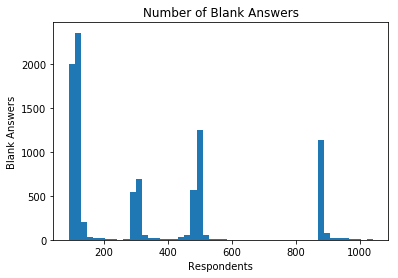

In [6]:
plt.hist(data.isna().sum(axis=1), bins=50)
plt.title("Number of Blank Answers")
plt.xlabel("Respondents")
plt.ylabel("Blank Answers")
plt.show()

As you can see, there are 4 distinct chunks of people, which roughly corresponds to the documentation of the years where the respondents participated in the longitudanal survey. We'll only use those who have participated from the beginning. 

Looking at this histogram I decided to make the cutoff of 200/1074 questions blank, which is about a 1/5. There is certainly room for debate to make the cutoff elsewhere. Those respondents are offically dropped from the data.

In [7]:
data = data[data.isna().sum(axis=1)<=200]
data.shape

(4641, 1074)

We are now down to 4641 respondnets. This will remain the case as we continue our wrangling.

# 3. Joining the column labels

Next I need to build a multiindex label for the columns of the dataset. The labels in the multiindex are:

1. Col_name: The name of the column from the survey. (see section 1.1)
2. Year: The year the question was given in the survey. The function in the next cell creates this variable and shows how it is done.
3. Type: The data type of the column. From the coltypes file. (see section 1.1)
4. Section: The subject matter of the column. From the coltypes file (see section 1.1)

By creating a multiindex column this way, I can create slices (mostly on 'Type') in order to apply certain operations in the cleaning process. I have yet to slice the data by 'Year', but I imagine it is only a matter of time before I do so. Again see Section 1.1 for more details.

In [8]:
#Thankfully, all of the column names are labeled such that it is easy to figure out which year they are from. 
#This function allows a slick pandas.apply to extract the year as part of the multiindex.

def get_year(col):
    if col[-4:] == "2012":
        year = 2012
    elif col[-4:] == "2016":
       year = 2016
    elif col[-4:] == "2017":
        year = 2017
    elif col[-4:] == "2018":
        year = 2018
    elif col[-8:] == "baseline":
        year = 2011
    else:
        year = "Other"
    
    return year

A sample of what the column labels look like now. 

In [9]:
#Creating the multiindex
arrays = [np.array(data.columns),\
          np.array(pd.Series(data.columns).apply(get_year)),\
          np.array(coltypes['Type']),\
          np.array(coltypes['Section'])]

midx = pd.MultiIndex.from_arrays(arrays, names=('Col_name', 'Year', 'Type', 'Section'))

data = pd.DataFrame(np.array(data), columns=midx)
data.sample(5, axis=1, random_state=1111).head(5)

Col_name,satisf_Economy_2018,abortview3_2016,therm_baseline,pid3_2018,selfdescr_ccap_7_baseline
Year,2018,2016,2011,2018,2011
Type,Cat_O,Cat_O_DN,Probably drop,Cat,Cat
Section,RespInfo,Cultural,ProbablyDrop,PolIden,PolIden
0,1,1,1,1,2
1,1,2,1,2,1
2,2,1,1,3,2
3,2,2,1,2,1
4,1,1,1,1,2


# 4. Cleaning up missing values and dealing with column Types

This shows all the types of data in the questions, the average number of blanks in each type, and how many of each type there are. The remainder of the wrangling will be tackling the blank values of each type of question. 

In [10]:
data.isna().sum().groupby(by='Type').agg(['mean', 'count']).sort_values('mean')

,mean,count
Type,,
Rand Indicator,0.000000,60
ID,5.333333,3
Cat_O_DN,21.078534,191
Change order,56.812500,16
1-100,80.200000,10
Cat,92.323529,306
1-100_DN,119.025000,40
Cat_O,293.204633,259
Number,1236.666667,3


As you can see, almost every data type has some blank values (with the exepction of 'Rand Indicator'). This means we need to examine the nature of the 'Type' and determine the best way to resolve these missing values.

### 4.1 Dropping irrelevant columns

First we drop the following Types:
1. Rand Indicator: Refers to the random order of how certain choices were given.
2. Probably drop: Refers to questions that I thought should be dropped while looking over them. These were often questions with text responses or were very irrelevant/outdated.
3. Info_Zip: Refers to Zip Codes of where the respondent lives. Too many numbers and not conducive to transform into a categorical variable. 
4. Unknown: Documentation not provided, or the meaning wasn't understood.

In [11]:
mask = (data.columns.get_level_values(2)!='Rand Indicator') &\
       (data.columns.get_level_values(2)!='Probably drop') &\
       (data.columns.get_level_values(2)!='Info_Zip') &\
       (data.columns.get_level_values(2)!='Unknown')

data = data[data.columns[mask]]

In [12]:
data.isna().sum().groupby(by='Type').agg(['mean', 'count']).sort_values('mean')

,mean,count
Type,,
ID,5.333333,3
Cat_O_DN,21.078534,191
Change order,56.812500,16
1-100,80.200000,10
Cat,92.323529,306
1-100_DN,119.025000,40
Cat_O,293.204633,259
Number,1236.666667,3
Weight,1651.333333,6


Now we are only left with columns that will possibly be used in the analysis. Let's break them down.

### 4.2 'Number' Columns

These columns deal represent numbers instead of categories. In this survey the only ones in this category are questions regarding birth years of the respondents and number of kids they have.

In [13]:
data.loc[:, data.columns.get_level_values(2)=='Number'].head(5)

Col_name,birthyr_2018,birthyr_baseline,child18num_baseline
Year,2018,2011,2011
Type,Number,Number,Number
Section,RespInfo,RespInfo,RespInfo
0,1931,1931,NaN
1,1952,1952,NaN
2,1931,1931,NaN
3,1952,1952,NaN
4,1939,1939,NaN


#### 4.2a Birthyears

As I was looking at the data, I found that some of the birthyears don't always match for some unknown reason.

In [14]:
agesmatch = np.array(data.loc[:, data.columns.get_level_values(0)=='birthyr_2018']) != \
            np.array(data.loc[:, data.columns.get_level_values(0)=='birthyr_baseline'])

birthmask = np.array((data.columns.get_level_values(0)=='birthyr_2018') |\
                     (data.columns.get_level_values(0)=='birthyr_baseline')).ravel()

data.loc[:, birthmask][agesmatch].head(5)

Col_name,birthyr_2018,birthyr_baseline
Year,2018,2011
Type,Number,Number
Section,RespInfo,RespInfo
6,1960,1961
7,1961,1951
10,1955,1956
11,1961,1960
16,1954,1947


However, all the blanks are in the baseline column, so we'll just remove that column and 
use the birthyr_2018 as the assumed birthyear for the respondent.

In [15]:
print(data.loc[:,birthmask].isna().sum())
data.drop('birthyr_baseline', axis=1, level=0, inplace=True)

Col_name          Year  Type    Section 
birthyr_2018      2018  Number  RespInfo     0
birthyr_baseline  2011  Number  RespInfo    23
dtype: int64


We need to make birthyear to a categorical variable, so we assign them a group based on their 2018 age.

In [16]:
age = 2018 - data.loc[:, data.columns.get_level_values(0)=='birthyr_2018']

In [17]:
print(age.min().values[0], age.max().values[0])

23.0 93.0


In [18]:
#Creating age buckets for age during 2018 election:
#18-29 = 0, 30-44=1, 45-60=2, Over 60=3
age2018buckets = pd.cut(age.values.ravel(), bins=[age.min().values[0]-1,29,45,60,age.max().values[0]],labels = False)
data.loc[:, data.columns.get_level_values(0)=='birthyr_2018'] = age2018buckets
data.loc[:, data.columns.get_level_values(0)=='birthyr_2018'].head(10)

Col_name,birthyr_2018
Year,2018
Type,Number
Section,RespInfo
0,3
1,3
2,3
3,3
4,3
5,3
6,2


#### 4.2b Number of kids 

There seemed to be a couple of outliers with 16 and 20 kids with the next lowest being 8 kids. This seemed to be an input error of some kind since the inputted ages didn't make sense either. 

In [19]:
rowlotsofkids_mask = np.array(data.loc[:,data.columns.get_level_values(0)=="child18num_baseline"]>7).ravel()
colmask_numkids = data.columns.get_level_values(0)=="child18num_baseline"
data.loc[rowlotsofkids_mask,colmask_numkids]

Col_name,child18num_baseline
Year,2011
Type,Number
Section,RespInfo
2397,8
2761,20
3562,16


I decide to manually cap the number of kids at 8. This allows me to say that each number 0-8 is its own category, with 8+ being its own category. 

In [20]:
data.loc[rowlotsofkids_mask,colmask_numkids] = data.loc[rowlotsofkids_mask,colmask_numkids].clip(upper=8)

Finally, we fill in all the missing values with 0 since this corresponds to having 0 kids. All of the blanks indicated that they answered the previous (and dropped) question of having kids at all, so this is safe to do.

In [21]:
data.loc[:, colmask_numkids] = data.loc[:, colmask_numkids].fillna(value=0)
data.loc[:,colmask_numkids].sample(5, random_state=1111)

Col_name,child18num_baseline
Year,2011
Type,Number
Section,RespInfo
1808,1.0
2439,0.0
4194,2.0
2794,0.0
2929,0.0


### 4.3 Categorical and 1-100 Columns

#### 4.3a Missing Values

We first deal with the following question types:
1. Cat_O_DN: Ordered, categorical responses that have a 'Don't Know' option to answer or something similar.
2. 1-100_DN: Typically questions that range from 1-100 and have a 'Don't Know' answer eg. "What are you feelings on muslims with 0 being cool and 100 being warm?"

Since these questions have a 'Don't know" option we will assign all the NAs as 'Don't know'. The 'Don't Know' reponse was always the largest number option, which makes the coding easier. 

In [22]:
DNcol_mask = (data.columns.get_level_values(2)=='Cat_O_DN') | (data.columns.get_level_values(2)=='1-100_DN')
DN_values = data.loc[:, DNcol_mask].max()
data.loc[:, DNcol_mask] = data.loc[:, DNcol_mask].fillna(value=DN_values)

Next we tackle the following types:
1. Cat: Unordered, categorical responses that don't have a 'Don't Know' option to answer or anything similiar.
2. 1-100: Like 1-100_DN but without a 'Don't Know' option. 
3. Cat_O: Ordered, categorical that don't have a 'Don't Know' option to answer or anything similiar.
4. Change order: Unordered, categorical responses that can be ordered if the possible responses are switched in some way

Since these questions don't have a 'Don't know" option we will assign all the missing values as 997.
997 was often used as 'Don't know' in similar questions in the survey so the choice adds some consistency.

In [23]:
othermask = (data.columns.get_level_values(2)=='Change order') |\
            (data.columns.get_level_values(2)=='1-100') |\
            (data.columns.get_level_values(2)=='Cat') |\
            (data.columns.get_level_values(2)=='Cat_O')

data.loc[:, othermask] = data.loc[:, othermask].fillna(value=997)

#### 4.3b Changing 1-100 Columns into Categorical Columns

Rather than have these responses scale from 1-100, we change it to 1-10 and make it categorical. 
We also keep the category '997' seperate and labeled the same.

In [24]:
#Before the change
mask_1_100 = (data.columns.get_level_values(2)=='1-100') |\
            (data.columns.get_level_values(2)=='1-100_DN')

data.loc[:, mask_1_100].head(5)

Col_name,ft_black_2017,ft_white_2017,ft_hisp_2017,ft_asian_2017,ft_muslim_2017,ft_jew_2017,ft_christ_2017,ft_fem_2017,ft_immig_2017,ft_gays_2017,...,ft_altright_2016,blacks_t_baseline,whites_t_baseline,asians_t_baseline,latinos_t_baseline,christians_t_baseline,jews_t_baseline,muslims_t_baseline,mormons_t_baseline,gays_t_baseline
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2016,2011,2011,2011,2011,2011,2011,2011,2011,2011
Type,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,...,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN
Section,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,...,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp
0,51.0,50.0,79.0,50.0,50.0,50.0,50.0,99.0,95.0,50.0,...,2.0,60.0,59.0,65.0,61.0,63.0,61.0,61.0,60.0,70.0
1,98.0,90.0,95.0,100.0,61.0,100.0,98.0,65.0,96.0,82.0,...,51.0,100.0,89.0,98.0,100.0,100.0,97.0,66.0,99.0,92.0
2,87.0,90.0,91.0,88.0,49.0,25.0,50.0,74.0,77.0,77.0,...,0.0,91.0,100.0,96.0,100.0,65.0,41.0,6.0,21.0,99.0
3,90.0,85.0,90.0,96.0,80.0,91.0,94.0,25.0,91.0,71.0,...,1.0,62.0,88.0,62.0,79.0,100.0,67.0,62.0,97.0,59.0
4,100.0,50.0,100.0,100.0,100.0,100.0,28.0,100.0,100.0,100.0,...,997.0,100.0,87.0,91.0,72.0,33.0,100.0,83.0,81.0,100.0


In [25]:
b = [-1,10,20,30,40,50,60,70,80,90,100,1000]
l = [0,1,2,3,4,5,6,7,8,9,997]
data.loc[:, mask_1_100] = data.loc[:, mask_1_100].apply(lambda c: pd.cut(c, bins=b, labels=l))

In [26]:
#After the change
data.loc[:, mask_1_100].head()

Col_name,ft_black_2017,ft_white_2017,ft_hisp_2017,ft_asian_2017,ft_muslim_2017,ft_jew_2017,ft_christ_2017,ft_fem_2017,ft_immig_2017,ft_gays_2017,...,ft_altright_2016,blacks_t_baseline,whites_t_baseline,asians_t_baseline,latinos_t_baseline,christians_t_baseline,jews_t_baseline,muslims_t_baseline,mormons_t_baseline,gays_t_baseline
Year,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2016,2011,2011,2011,2011,2011,2011,2011,2011,2011
Type,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,...,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN,1-100_DN
Section,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,...,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp,FavTemp
0,5,4,7,4,4,4,4,9,9,4,...,0,5,5,6,6,6,6,6,5,6
1,9,8,9,9,6,9,9,6,9,8,...,5,9,8,9,9,9,9,6,9,9
2,8,8,9,8,4,2,4,7,7,7,...,0,9,9,9,9,6,4,0,2,9
3,8,8,8,9,7,9,9,2,9,7,...,0,6,8,6,7,9,6,6,9,5
4,9,4,9,9,9,9,2,9,9,9,...,997,9,8,9,7,3,9,8,8,9


### 4.4 Columns that are tied to other columns

These are columns that are based on other responses to previous questions, like follow-up questions. Since each question is slightly different, each requires its own treatment. The general approach will be to modify the answers to the question that these columns are tied to so they capture the information provided in these responses. Then we can delete all these questions since the info is captured elsewhere.

We want to fill the blanks in these columns with 0 since 0 will add no new information if the question was left blank.

In [27]:
data.loc[:, data.columns.get_level_values(2)=="Tied to nearby column"] =\
    data.loc[:, data.columns.get_level_values(2)=="Tied to nearby column"].fillna(value=0)

In [28]:
data.loc[:, data.columns.get_level_values(2)=="Tied to nearby column"].head()

Col_name,unemployed_2018,vote2018_force_2017,immi_contribution_treat_2017,contact_english_treat_2017,job_looking_2017,pp_demprim16_2016,pp_repprim16_2016,vote2016_cand2_2016,vote_for_against_2016,cmatch_romn_f_baseline
Year,2018,2017,2017,2017,2017,2016,2016,2016,2016,2011
Type,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column,Tied to nearby column
Section,RespInfo,Voting,Immigration,Immigration,RespInfo,Voting,Voting,Voting,Voting,Pol_Views
0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,2.0,2.0,0.0,0.0,4.0,0.0,2.0,0.0
4,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
#Changes the responses to employment based on the following survey question:
#"If unemployed, are you currently looking for a job?"
#If they answered with 'No', change 3->3.5, 4-4.5 on the employment_2018 question to distinguish reponses.

c1 = np.array((data.loc[:,data.columns.get_level_values(0)=="employment_2018"]==3) |\
                   (data.loc[:,data.columns.get_level_values(0)=="employment_2018"]==4)).ravel()
c2 = np.array((data.loc[:,data.columns.get_level_values(0)=="unemployed_2018"]==2)).ravel()

rowmask = c1&c2
colmask = data.columns.get_level_values(0)=="employment_2018"
data.loc[rowmask,colmask] = data.loc[rowmask,colmask] + .5

In [30]:
#Does the same thing as above but for 2017

c1 = np.array((data.loc[:,data.columns.get_level_values(0)=="employment_status_2017"]==3) |\
                   (data.loc[:,data.columns.get_level_values(0)=="employment_status_2017"]==4)).ravel()
c2 = np.array((data.loc[:,data.columns.get_level_values(0)=="job_looking_2017"]==2)).ravel()

rowmask = c1&c2
colmask = data.columns.get_level_values(0)=="employment_status_2017"
data.loc[rowmask,colmask] = data.loc[rowmask,colmask] + .5

In [31]:
#The columns "contact_english_treat_2017" and "immi_contribution_treat_2017" shows which of 2 questions were 
#given to the respondent.
#Since each respondent only received 1 version of the question, I decided to just drop them altogether 
#to not worry about working this into the model since it is a unique occurance.
dropcols = ["contact_english_a_2017","contact_english_b_2017","immi_contribution_a_2017","immi_contribution_b_2017"]
data.drop(labels=dropcols, axis=1, level="Col_name", inplace=True)

In [32]:
#rowmask=respondent answered “other,” “not sure,” or “would not vote" to the question:
#"If an election for U.S. Congress were being held today, who would you vote for in the district where you live?"
#Take their response to the question:
#If you had to choose, would you lean more toward the R candidate or the D candidate?...
#...divide it by 10 and add it to their previous response. This creates new categories multiplicativly.
#eg. response to Q1=3 and Q2=3, new response is 3.3

rowmask = np.array((data.loc[:,data.columns.get_level_values(0)=="vote2018_2017"]==3) |\
                   (data.loc[:,data.columns.get_level_values(0)=="vote2018_2017"]==4) |\
                   (data.loc[:,data.columns.get_level_values(0)=="vote2018_2017"]==5)).ravel()

colmask = data.columns.get_level_values(0)=="vote2018_2017"
colmask_force = data.columns.get_level_values(0)=="vote2018_force_2017"
data.loc[rowmask,colmask] = data.loc[rowmask,colmask] + np.array(data.loc[rowmask,colmask_force]/10)

In [33]:
#Similiar process to the above, but asking about the 2016 presidential primary voting choice questions
rowmask_dem = np.array(data.loc[:,data.columns.get_level_values(0)=="pp_primary16_2016"]==1).ravel()
rowmask_rep = np.array(data.loc[:,data.columns.get_level_values(0)=="pp_primary16_2016"]==2).ravel()

colmask = data.columns.get_level_values(0)=="pp_primary16_2016"
colmask_dem = data.columns.get_level_values(0)=="pp_demprim16_2016"
colmask_rep = data.columns.get_level_values(0)=="pp_repprim16_2016"

data.loc[rowmask_dem,colmask] = data.loc[rowmask_dem,colmask] + np.array(data.loc[rowmask_dem,colmask_dem]/10)
data.loc[rowmask_rep,colmask] = data.loc[rowmask_rep,colmask] + np.array(data.loc[rowmask_rep,colmask_rep]/10)

In [34]:
#Similar process, but refers to general election 'other' votes who have to choose between 2 main candidates in 2016
rowmask = np.array((data.loc[:,data.columns.get_level_values(0)=="presvote16post_2016"]>2)&\
                   (data.loc[:,data.columns.get_level_values(0)=="presvote16post_2016"]<8)).ravel()

colmask = data.columns.get_level_values(0)=="presvote16post_2016"
colmask_force = data.columns.get_level_values(0)=="vote2016_cand2_2016"
data.loc[rowmask,colmask] = data.loc[rowmask,colmask] + np.array(data.loc[rowmask,colmask_force]/10)

In [35]:
#Similar process, but refers to respondent general election vote being for or against the main canidates
rowmask = np.array(data.loc[:,data.columns.get_level_values(0)=="presvote16post_2016"]<=2).ravel()

colmask = data.columns.get_level_values(0)=="presvote16post_2016"
colmask_force = data.columns.get_level_values(0)=="vote_for_against_2016"

data.loc[rowmask,colmask] = data.loc[rowmask,colmask] + np.array(data.loc[rowmask,colmask_force]/10)

In [36]:
#Similar process, but refers to general election 'other' votes who have to choose between 2 main candidates in 2012
rowmask = np.array((data.loc[:,data.columns.get_level_values(0)=="cmatch_romn_baseline"]==3)|\
                   (data.loc[:,data.columns.get_level_values(0)=="cmatch_romn_baseline"]==4)).ravel()

colmask = data.columns.get_level_values(0)=="cmatch_romn_baseline"
colmask_force = data.columns.get_level_values(0)=="cmatch_romn_f_baseline"
data.loc[rowmask,colmask] = data.loc[rowmask,colmask] + np.array(data.loc[rowmask,colmask_force]/10)

In [37]:
#Now that all the columns have been captured by the columns the correspond to,
#they contribute no new information and can be droped.
data.drop(labels="Tied to nearby column", axis=1, level="Type", inplace=True)

## 5. Final Look

Let's take one last look at the remaining columns types and their blank values.

In [38]:
data.isna().sum().groupby(by='Type').agg(['mean', 'count']).sort_values('mean')

,mean,count
Type,,
1-100,0.000000,10
1-100_DN,0.000000,40
Cat,0.000000,306
Cat_O,0.000000,255
Cat_O_DN,0.000000,191
Change order,0.000000,16
Number,0.000000,2
ID,5.333333,3
Weight,1651.333333,6


As you can see, we have taken care of all the missing values in the data that are relevant for analysis since the 'mean' column is mostly 0s. The missing values left are in the ID and Weight categories, which won't be going into the model.

Finally, we export our cleaned data for future use.

In [39]:
data.to_csv('CleanedData.csv')